# Task 34-> Deep Learning with TensorFlow/Keras

# Artificial Neural Networks (ANNs):
## Definition: 
ANNs are computational models inspired by the human brain, designed to recognize patterns, classify data, and predict outcomes by learning from data through interconnected processing elements called neurons.

## Importing Necessary Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch

2024-08-15 08:11:24.303515: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 08:11:24.303578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 08:11:24.305232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the dataset


In [2]:
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

## Display first 5 rows


In [3]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing
## Check for missing values


In [4]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Encode categorical variables


In [5]:
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

## Using One Hot Encoding to Encode Geograpgy

In [6]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
geography_encoded = onehot_encoder.fit_transform(data[['Geography']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
geography_df = pd.DataFrame(geography_encoded, columns=onehot_encoder.get_feature_names_out(['Geography']))
data = pd.concat([data, geography_df], axis=1)
data.drop(['Geography', 'Surname', 'RowNumber', 'CustomerId'], axis=1, inplace=True)
geography_df.head()

,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0


## Split the dataset into features and labels


In [8]:
X = data.drop('Exited', axis=1)
y = data['Exited']

## Split the dataset into training and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the model


In [11]:
model = Sequential()

# Types of Layers in ANN:
## 1. Input Layer:

### Function: 
Receives input data from external sources and passes it to the subsequent layers.
### Subtypes:
#### Simple input layers: 
For handling basic structured data.
#### Embedding layers: 
For handling categorical data, often used in Natural Language Processing (NLP).



In [12]:
# Input layer and first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2. Hidden Layer:

### Function: 
Processes inputs received from the input layer by applying weights and biases, transforming them into outputs passed to the next layer.
### Subtypes:
#### Fully Connected (Dense) Layer: 
Every neuron in the layer is connected to every neuron in the subsequent layer.
#### Convolutional Layer: 
Used in Convolutional Neural Networks (CNNs) for image data; applies convolution operations to input data to extract features.
#### Recurrent Layer: 
Used in Recurrent Neural Networks (RNNs); helps in processing sequences of data by maintaining a 'memory' of previous inputs.
#### Dropout Layer: 
Used to prevent overfitting by randomly setting a fraction of input units to zero during training.


In [13]:
# Second hidden layer
model.add(Dense(units=32, activation='tanh'))

In [14]:
# Adding dropout to prevent overfitting
model.add(Dropout(rate=0.3))

In [15]:
# Third hidden layer (LSTM as a recurrent layer)
model.add(Flatten())  # Flatten the input to prepare for LSTM
model.add(Dense(units=16, activation='relu'))  # Adding another dense layer after flattening

## 3. Output Layer:

### Function: 
Produces the final output of the network based on the processed inputs from the hidden layers.
### Subtypes:
#### Binary Output: 
Typically uses a sigmoid activation function for binary classification tasks.
#### Multi-class Output: 
Often uses softmax activation for multi-class classification tasks.

In [16]:
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

## Summary of Model

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model


In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Train the model


In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7154 - loss: 0.5741 - val_accuracy: 0.8106 - val_loss: 0.4303
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.4364 - val_accuracy: 0.8356 - val_loss: 0.3971
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8234 - loss: 0.4141 - val_accuracy: 0.8456 - val_loss: 0.3747
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.3967 - val_accuracy: 0.8494 - val_loss: 0.3625
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8435 - loss: 0.3693 - val_accuracy: 0.8475 - val_loss: 0.3614
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8433 - loss: 0.3690 - val_accuracy: 0.8487 - val_loss: 0.3561
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3476 - val_accuracy: 0.8487 - val_loss: 0.3515
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3510 - val_accu

## Evaluate the model


In [20]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nTest Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Accuracy: 0.8555


## Confusion matrix


In [21]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1542   65]
 [ 224  169]]


 # Plot Results
 ## 1. Loss and accuracy curves



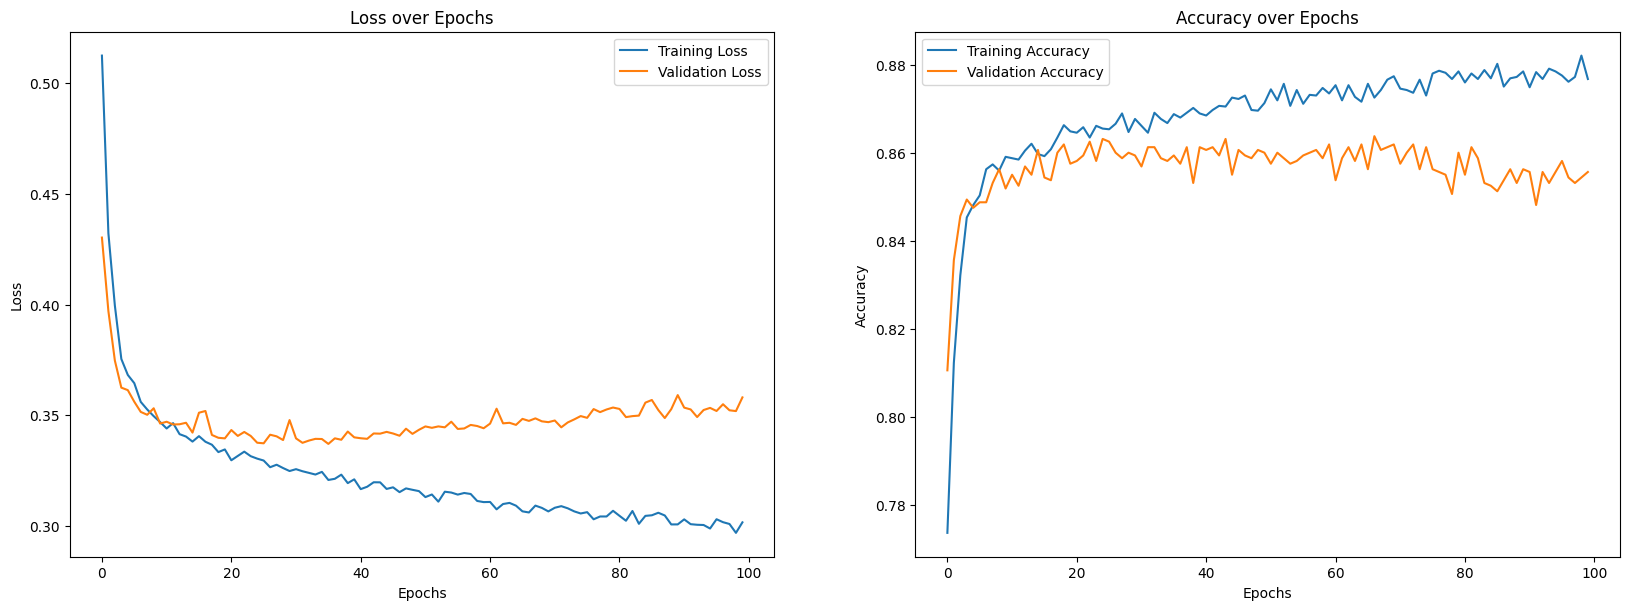

In [22]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 2. Confusion matrix heatmap


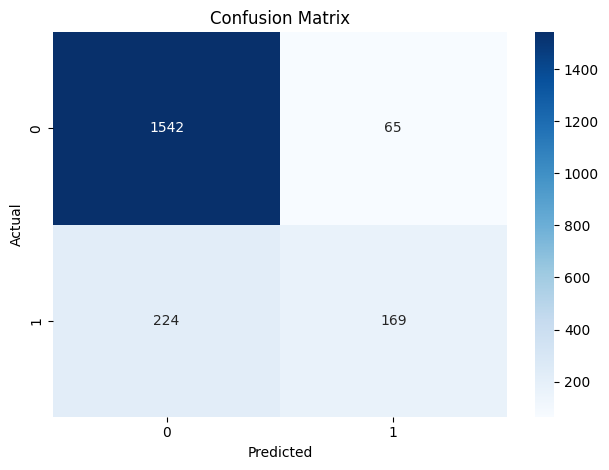

In [23]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## 3. ROC Curve


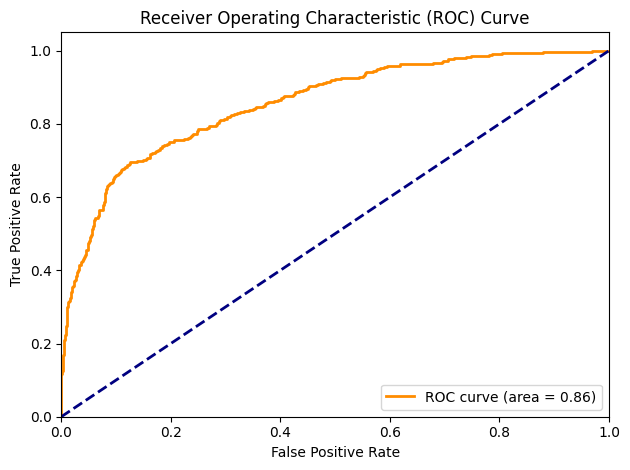

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## 4. Learning Rate vs. Loss Plot


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


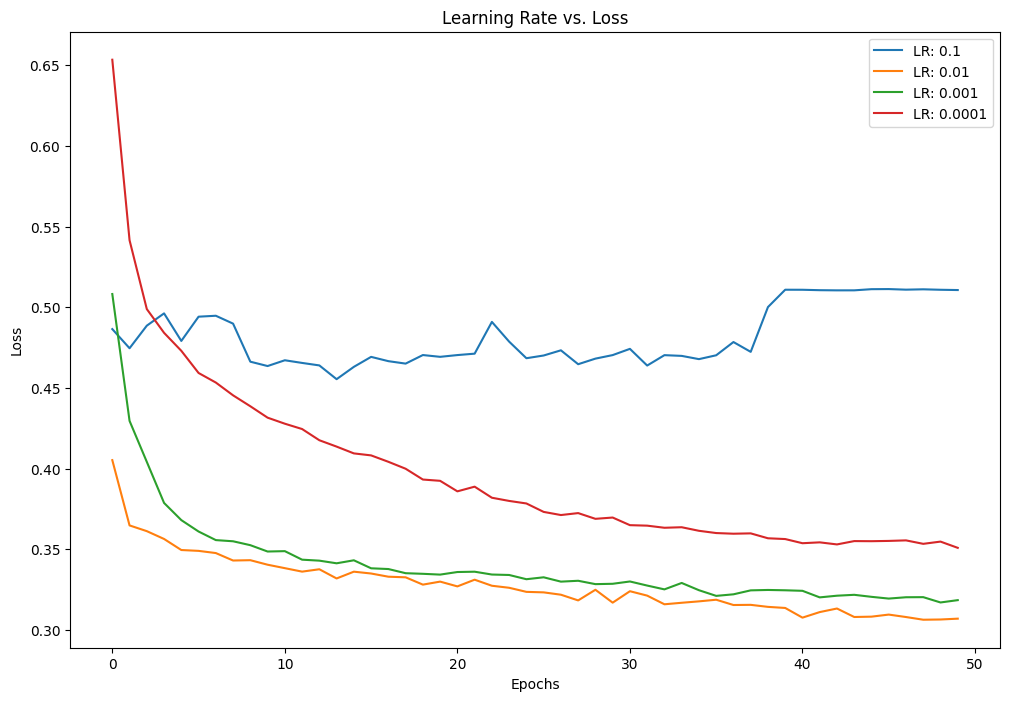

In [25]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
histories = []

for lr in learning_rates:
    model = Sequential([
        Dense(32, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='tanh'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    histories.append(history)

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'LR: {learning_rates[i]}')
plt.title('Learning Rate vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 5. Model Architecture Visualization


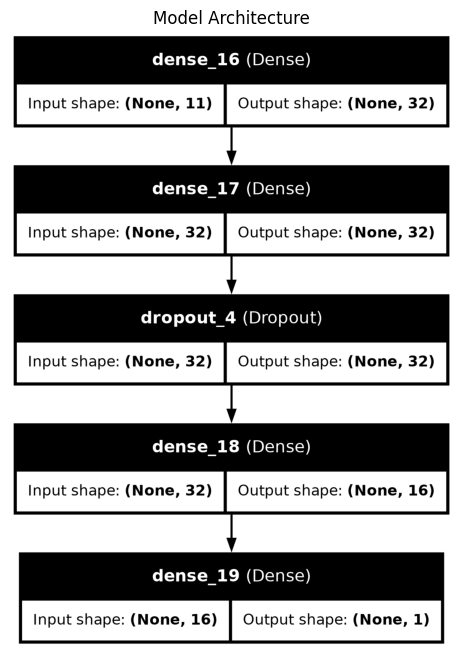

In [26]:
from tensorflow.keras.utils import plot_model

plt.figure(figsize=(12, 8))
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
plt.imshow(plt.imread('model_architecture.png'))
plt.axis('off')
plt.title('Model Architecture')
plt.show()